In [1]:
import os
os.chdir("..")

In [2]:
from configs.parser import Parser

C = Parser("configs/default.yaml").C.data
C

dataset:
  mode: fine
  root: ./cityscapes
  target_type: semantic
loader:
  batch_size: 6
name: cityscapes

In [3]:
from datas import get_loader

train_loader = get_loader(C, "train", distributed=False)
valid_loader = get_loader(C, "val", distributed=False)

cityscapes {'root': './cityscapes', 'mode': 'fine', 'target_type': 'semantic'} train
cityscapes {'root': './cityscapes', 'mode': 'fine', 'target_type': 'semantic'} val


In [29]:
import matplotlib.pyplot as plt
from torchvision import transforms


to_pil = transforms.ToPILImage()


def plot(img, mask):
    img = to_pil(img)#.convert("RGB")
    mask = mask.numpy()[0]
    mask[mask == 255] = 0
    
    fig, ax  = plt.subplots(1, 2)
    ax[0].set_title("Image")
    ax[0].imshow(img)
    ax[1].set_title(f"Mask : {np.unique(mask)}")
    ax[1].imshow(mask)
    plt.show()

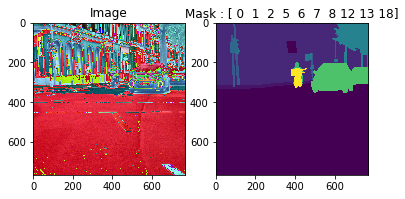

In [30]:
for img, mask in train_loader.dataset:
    plot(img, mask)
    break